In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
72+72+74/3

168.66666666666666

In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df['gender'].dtypes

dtype('O')

In [10]:
df['gender'].dtypes=='O'

True

In [11]:
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']

In [12]:
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']

In [13]:
df[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [14]:
df[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [15]:
df.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## Null value

In [16]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.duplicated().sum()

0

Unique values in each column

In [19]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [20]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [22]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [23]:
df.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [24]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot: xlabel='math score', ylabel='Density'>

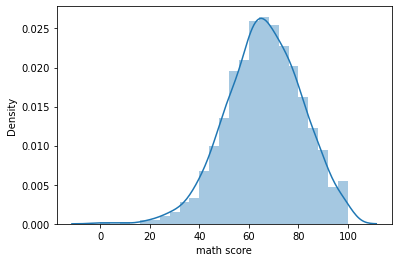

In [25]:
sns.distplot(df['math score'])

In [26]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [27]:
df['Avarge']=(df['math score']+df['reading score']+df['writing score'])/3

In [28]:
df["Avarge"].head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: Avarge, dtype: float64

In [29]:
df.groupby('gender').mean()

,math score,reading score,writing score,Avarge
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [30]:
df.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


No of student whoever is having less than 30 marks math

In [31]:
df[df["math score"] < 30].count()


gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Avarge                         14
dtype: int64

In [32]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Avarge'],
      dtype='object')

In [33]:
data_num=df[num_col]

In [34]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [36]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [38]:
from scipy.stats import normaltest

In [39]:
normaltest(data_num['reading score'])[1]*100

0.3853758403576582

In [40]:
# if p>0.05 then data will be normal distributed

<AxesSubplot: xlabel='reading score', ylabel='Density'>

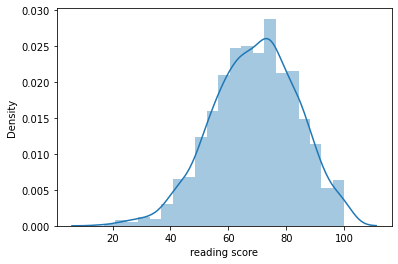

In [41]:
sns.distplot(data_num['reading score'])

<AxesSubplot: xlabel='reading score', ylabel='Density'>

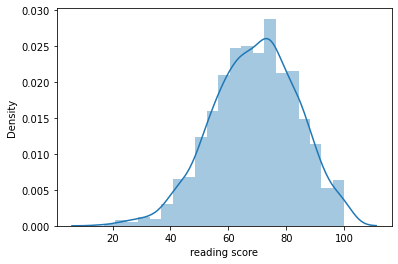

In [42]:
sns.distplot(data_num['reading score'])

## Outliers

<AxesSubplot: >

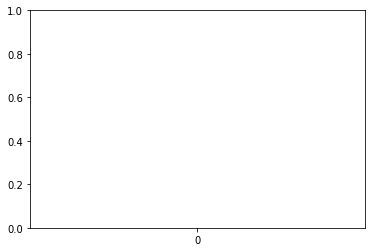

In [43]:
sns.boxplot(df=df['writing score'])


<AxesSubplot: >

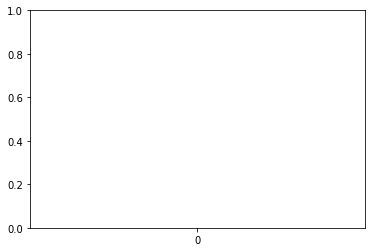

In [44]:
sns.boxplot(df=df['reading score'])


In [45]:
q1=df['math score'].quantile(0.25)

In [46]:
q3=df['math score'].quantile(0.75)

In [47]:
IQR=q3-q1

In [48]:
upper_limit=q3+(1.5*IQR)

In [49]:
upper_limit

107.0

In [50]:
lower_limit=q1-(1.5*IQR)

In [51]:
lower_limit

27.0

In [52]:
data_outlier=df[df['math score']<lower_limit]

In [53]:
data_num.drop(data_outlier.index)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [54]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [55]:
df[df['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge


In [56]:
df['math score'].quantile(1.00)

100.0

In [57]:
df['math score'].min()

0

In [58]:
df['math score'].max()

100

In [59]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [60]:
def get_iqr(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence


In [61]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [62]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2
    +(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [63]:
def replace_with_threshold(df,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        df.loc[df[variable]<low_limit,variable]=low_limit
        df.loc[df[variable]>upper_limit,variable]=upper_limit
        
    

In [64]:
replace_with_threshold(data_num,data_num.columns)

In [67]:
df.describe()

,math score,reading score,writing score,Avarge
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [68]:
data_num

,math score,reading score,writing score
0,72,72,74.0
1,69,79,79.0
2,77,79,79.0
3,47,57,44.0
4,76,78,75.0
...,...,...,...
995,77,79,79.0
996,62,55,55.0
997,59,71,65.0
998,68,78,77.0


In [69]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])



In [70]:
identifying_treating_outliers(df,"math score","fill")
identifying_treating_outliers(df,"reading score","fill")
identifying_treating_outliers(df,"writing score","fill")

## graph analysis

In [71]:
df.describe()

,math score,reading score,writing score,Avarge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.165000,69.201000,68.094375,67.770667
std,14.922414,14.503481,15.068368,14.257326
min,27.000000,29.000000,25.875000,9.000000
25%,57.000000,59.000000,57.750000,58.333333
50%,66.000000,70.000000,69.000000,68.333333
75%,77.000000,79.000000,79.000000,77.666667
max,100.000000,100.000000,100.000000,100.000000


<AxesSubplot: xlabel='gender', ylabel='count'>

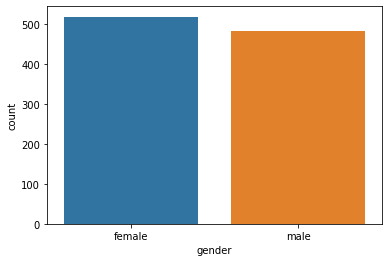

In [72]:
sns.countplot(data = df, x = "gender")

<AxesSubplot: xlabel='race/ethnicity', ylabel='count'>

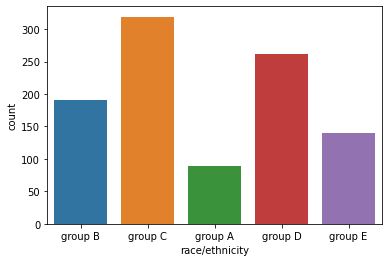

In [73]:
sns.countplot(data = df, x = "race/ethnicity")

In [74]:
df.groupby('gender').mean()

,math score,reading score,writing score,Avarge
gender,,,,
female,63.779923,72.640927,72.503378,69.569498
male,68.728216,65.504149,63.356068,65.837483


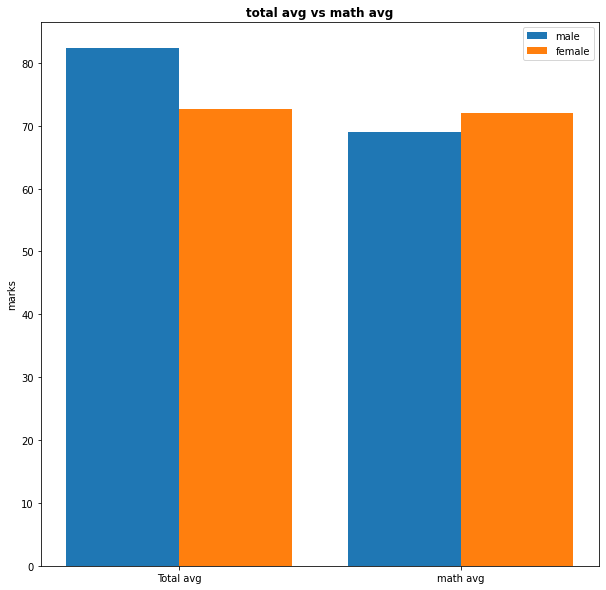

In [96]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['Avarge'][0],df['math score'][0]
male_score=df['Avarge'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [97]:
data_num.head()

,math score,reading score,writing score
0,72,72,74.0
1,69,79,79.0
2,77,79,79.0
3,47,57,44.0
4,76,78,75.0


In [98]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.799114,0.785275
reading score,0.799114,1.000000,0.949053
writing score,0.785275,0.949053,1.000000


<AxesSubplot: >

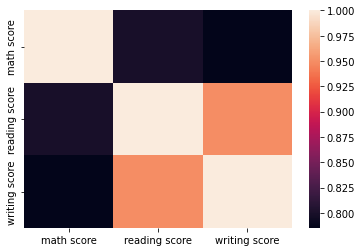

In [99]:
sns.heatmap(data_num.corr())

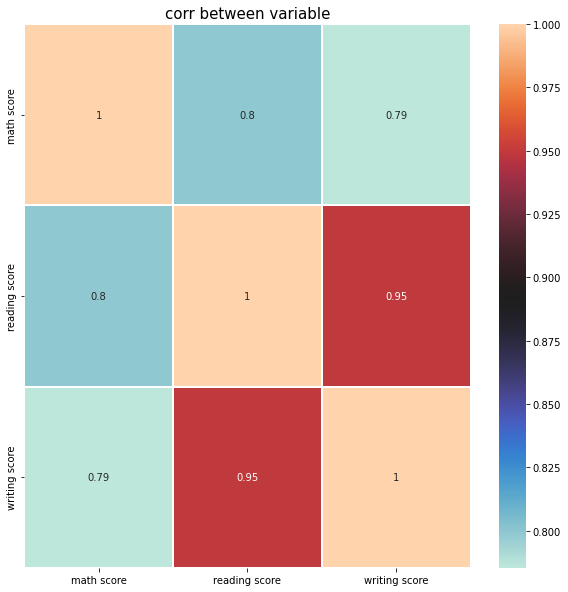

In [100]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

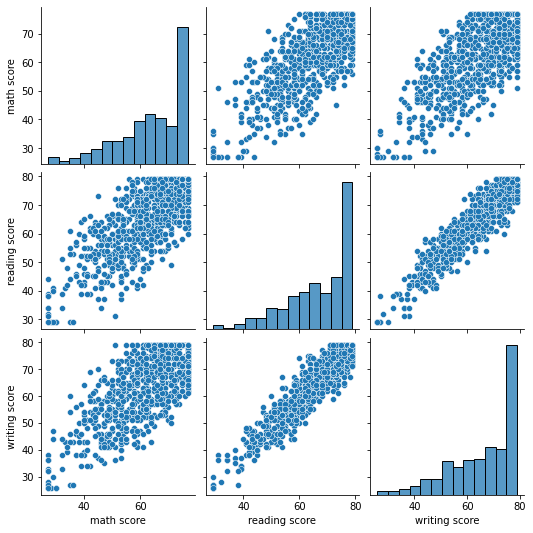

In [88]:
sns.pairplot(data_num)

<AxesSubplot: >

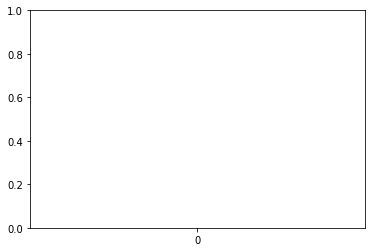

In [87]:
sns.violinplot(df=data_num)

In [86]:
import numpy as np
data_num.head()

,math score,reading score,writing score
0,72,72,74.0
1,69,79,79.0
2,77,79,79.0
3,47,57,44.0
4,76,78,75.0


<AxesSubplot: xlabel='math score', ylabel='Density'>

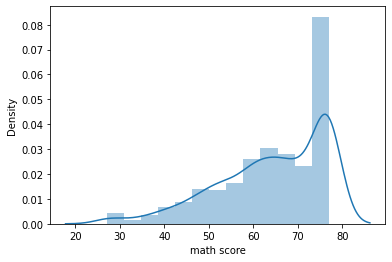

In [85]:
sns.distplot(data_num['math score'])

<AxesSubplot: xlabel='math score', ylabel='Density'>

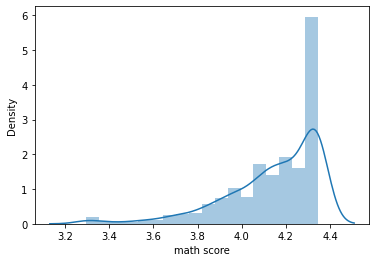

In [84]:
sns.distplot(np.log(data_num['math score']))

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(data_num)

StandardScaler()

In [83]:
scaler.transform(data_num)

array([[ 0.64111445,  0.41264193,  0.62435433],
       [ 0.39560215,  1.00503191,  1.02321994],
       [ 1.05030161,  1.00503191,  1.02321994],
       ...,
       [-0.42277218,  0.32801479, -0.09360379],
       [ 0.31376472,  0.92040477,  0.8636737 ],
       [ 1.05030161,  1.00503191,  1.02321994]])